# COVID Project
Heidi Hanson - 4/4/2020
All data can be found in my SPARC directory and I have uploaded it into Ubox
I downloaded the US population data from Data.gov 3/20/2020
I originally downloaded the Covid-19 cases on 3/20/2020 and updated it 3/31/2020
I downloaded the hospitalization and ICU rates from the CDC on 3/20/2020

**Importing Data**
T0 data is from the NYTimes
CaseCnt data is older (3/22)- New updated file, CaseCnt0331 is the updated file
https://github.com/nytimes/covid-19-data

In [1]:
##Last run 3/31/2020 at 9:10 am
##url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
##filename, headers = urllib.request.urlretrieve(url, filename=(r"X:\PPG\FLAG\FLAGDataHeidi\SPARC\us-states.csv"))

##url2 = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
##filename, headers = urllib.request.urlretrieve(url2, filename=(r"X:\PPG\FLAG\FLAGDataHeidi\SPARC\us-counties.csv"))

##Last run 4/2/2020
##url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
##filename, headers = urllib.request.urlretrieve(url3, filename=(r"X:\PPG\FLAG\FLAGDataHeidi\SPARC\time_series_covid19_confirmed_US.csv"))

In [2]:
#Librarires:
import geopandas as gpd
import pandas as pd
import numpy as np
import fiona
import descartes
import contextily as ctx #Basemaps
import pygrowthmodels
import urllib.request
import shapefile
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify as mc
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
PopData = pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\Census\cc-est2018-alldata.csv", encoding='ISO-8859-1') 
t0 = pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\Statet0.csv", encoding='ISO-8859-1') 
CaseCnt=pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\CasesOverTime.csv", encoding='ISO-8859-1')

##Hopkins Git data
CaseCnt3=pd.read_csv(r"X:\PPG\FLAG\FLAGDataHeidi\SPARC\time_series_covid19_confirmed_US.csv", encoding='ISO-8859-1')

Source of Data for Hospital and ICU Beds: Harvard estimated corrected for underreporting in AHA
https://globalepidemics.org/2020/03/17/caring-for-covid-19-patients/
HH Downloaded 3/26/20
Source Information in 

HRR – Hospital Referral Region (HRR), specifying a market within which people generally go to the same hospitals
Total Hospital Beds – Count of all hospitable beds within an HRR that are set up and staffed
Total ICU Beds – Count of all ICU beds within an HRR that are set up and staffed
Available Hospital Beds – How many hospital beds are unoccupied at any given time, on average
Potentially Available Hospital Beds – How many beds could be available if occupancy rate was reduced by 50% for non-COVID patients 
Available ICU Beds  – How many ICU beds are unoccupied on average
Potentially Available ICU Beds – How many beds could be available if occupancy rate was reduced by 50% for non-COVID patients        
Adult Population – How many people over the age of 18 living within the HRR
Population 65+ – How many people over the age of 65 living within the HRR
Projected Infected Individuals – How many individuals over the age of 18 are expected to get infected with COVID-19 over the entire course of the pandemic
Projected Hospitalized Individuals – How many individuals over the age of 18 are expected to need hospitalization due to COVID-19 over the entire course of the pandemic        
Projected Individuals Needing ICU – How many individuals over the age of 18 are expected to need ICU care due to COVID-19 over the entire course of the pandemic           
Hospital/ICU Beds Needed, X Months – How many hospital/ICU beds would have to be available to care for all patients requiring hospital care within X months
Percentage of Available Hospital/ICU Beds Needed, X Months – What percentage of available hospital/ICU beds would need to be committed to COVID patients to care for all patients in X months
Percentage of Potentially Available Hospital/ICU Beds Needed, X Months – What percentage of potentially available hospital/ICU beds would need to be committed to COVID patients to care for all patients in X months
Percentage of Total Hospital/ICU Beds Needed, X Months – What percentage of all hospital/ICU beds would need to be committed to COVID patients to care for all patients in X months'''



In [4]:
'''HRR Level Data'''
HHBeds=pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\HRR Scorecard20.csv")
HHBeds.head(15)
print(HHBeds.iloc[:1])
print('Total Number of Hospital Beds HRR Data:') 
print(sum(HHBeds['Total Hospital Beds']))

'''State Level Data'''
StateBeds=pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\StateScorecard20.csv", encoding='ISO-8859-1')
StateBeds.head(15)
print(StateBeds.iloc[:1])
print('Total Number of Hospital Beds State Data:') 
print(sum(StateBeds['Total Hospital Beds']))

'''Note: There are more beds in the State Level Data than the HRR Data... 746170 vs 738401'''

           HRR      hrr_name  Total Hospital Beds  Total ICU Beds  \
0  Abilene, TX  TX - Abilene                  980             127   

   Available Hospital Beds  Potentially Available Hospital Beds*  \
0                      565                                   772   

   Available ICU Beds  Potentially Available ICU Beds*  Adult Population  \
0                  68                               98            226444   

   Population 65+  ...  \
0           50412  ...   

   Percentage of Potentially Available ICU Beds Needed, Six Months  \
0                                               142%                 

  Percentage of Total ICU Beds Needed, Six Months  \
0                                            109%   

  ICU Beds Needed, Twelve Months  \
0                             70   

  Percentage of Available ICU Beds Needed, Twelve Months  \
0                                               103%       

  Percentage of Potentially Available ICU Beds Needed, Twelve Months  \
0   

'Note: There are more beds in the State Level Data than the HRR Data... 746170 vs 738401'

In [5]:
HRRshp=gpd.read_file("X:\PPG\FLAG\FLAGDataHeidi\SPARC\Hospital Referral Region\geo_export_87bc15fc-3bc1-40e7-95e0-407e9005b476.dbf")
print(HRRshp.head(2))
HRRshp=HRRshp.merge(HHBeds, on='hrr_name')
print(HRRshp.head(2))

Stateshp=gpd.read_file("X:\PPG\FLAG\FLAGDataHeidi\SPARC\cb_2018_us_state_500k\cb_2018_us_state_500k.shp")
print(Stateshp.head(2))
StateBeds['STUSPS']=StateBeds['State']
Stateshp=Stateshp.merge(StateBeds, on='STUSPS')
print(Stateshp.head(2))

   _feature_i  _feature_2  cnt_hrr__1  cnt_hrr__2  cnt_hrr_na  count_of_b  \
0         1.0  Untitled.1         0.0         6.0         6.0     42409.0   
1         2.0  Untitled.2         0.0         6.0         6.0     44192.0   

         hrr_name  hrr_num    shape_area     shape_leng  \
0  TX - Harlingen    396.0  6.091259e+09  465957.402813   
1    TX - McAllen    402.0  8.093501e+09  473266.016505   

                                            geometry  
0  MULTIPOLYGON (((-97.22571 26.56522, -97.24062 ...  
1  POLYGON ((-98.90930 26.93800, -98.84940 26.939...  
   _feature_i  _feature_2  cnt_hrr__1  cnt_hrr__2  cnt_hrr_na  count_of_b  \
0         1.0  Untitled.1         0.0         6.0         6.0     42409.0   
1         2.0  Untitled.2         0.0         6.0         6.0     44192.0   

         hrr_name  hrr_num    shape_area     shape_leng  ...  \
0  TX - Harlingen    396.0  6.091259e+09  465957.402813  ...   
1    TX - McAllen    402.0  8.093501e+09  473266.016505  ...   



**Recode to match CDC Report**

PEDSF Summary - See the pdf here for all variable definitions - X:\PPG\FLAG\FLAGDataHeidi\SPARC\Census
<br /> Year - We need 11 (7/1/2018 population estimate)
<br /> AGE GROUP
<br />  0 = Total
<br />  1 = Age 0 - 4
<br />  2 = Age 5 - 9
<br />  3 = Age 10 - 14
<br />  4 = Age 15 - 19
<br />  5 = Age 20 - 24
<br />  6 = Age 25 - 29
<br />  7 = Age 30 - 34
<br />  8 = Age 35 - 39
<br />  9 = Age 40 - 44
<br />  10 = Age 45 - 49
<br />  11 = Age 50 - 54
<br />  12 = Age 55 - 59
<br />  13 = Age 60 - 64
<br />  14 = Age 65 - 69
<br />  15 = Age 70 - 74
<br />  16 = Age 75 - 79
<br />  17 = Age 80 - 84
<br />  18 = Age 85+

In [6]:
##Recode Age to match CDC report
PopData['AgeGrp2']='Total'
PopData.loc[PopData.AGEGRP==1,'AgeGrp2']='0-19'
PopData.loc[PopData.AGEGRP==2, 'AgeGrp2']='0-19'
PopData.loc[PopData.AGEGRP==3, 'AgeGrp2']='0-19'
PopData.loc[PopData.AGEGRP==4, 'AgeGrp2']='0-19'
PopData.loc[PopData.AGEGRP==5, 'AgeGrp2']='20-44'
PopData.loc[PopData.AGEGRP==6, 'AgeGrp2']='20-44'
PopData.loc[PopData.AGEGRP==7, 'AgeGrp2']='20-44'
PopData.loc[PopData.AGEGRP==8, 'AgeGrp2']='20-44'
PopData.loc[PopData.AGEGRP==9, 'AgeGrp2']='20-44'
PopData.loc[PopData.AGEGRP==10, 'AgeGrp2']='45-54'
PopData.loc[PopData.AGEGRP==11, 'AgeGrp2']='45-54'
PopData.loc[PopData.AGEGRP==12, 'AgeGrp2']='55-64'
PopData.loc[PopData.AGEGRP==13, 'AgeGrp2']='55-64'
PopData.loc[PopData.AGEGRP==14, 'AgeGrp2']='65-74'
PopData.loc[PopData.AGEGRP==15, 'AgeGrp2']='65-74'
PopData.loc[PopData.AGEGRP==16, 'AgeGrp2']='75-84'
PopData.loc[PopData.AGEGRP==17, 'AgeGrp2']='75-84'
PopData.loc[PopData.AGEGRP==18, 'AgeGrp2']='85+'


##Subset data to 2018 estimates
PopData18 = PopData[PopData['YEAR']==11]


Estimates of best/worst case scenarios based on CDC MMWR
https://www.cdc.gov/mmwr/volumes/69/wr/mm6912e2.htm?s_cid=mm6912e2_w
Data from 49 states, DC, and three US territories reporting to CDC Feb 12 - March 16
Cases include COVID-19 cases confirmed by state or local public health labs
1514 are missing hospitalization
2253 missing ICU
2001 missing death
386 missing age

In [7]:
##4226 COVID-19 cases (rate of increase is 500 per day)
PopData18=PopData18[['STATE','COUNTY','STNAME','CTYNAME','AGEGRP','TOT_POP','AgeGrp2']]

r={'AgeGrp2':['0-19','20-44','45-54','55-64','65-74','75-84','85+'],
          'HospitalizationLower':[0.016,0.143,0.212,0.205,0.286,0.305,0.313],
          'HospitalizationUpper':[0.025,0.208,0.283,0.301,0.435,0.587,0.703],
          'ICULower':[0.0,0.020,0.054,0.047,0.081,0.105,0.063],
          'ICUUpper':[0.0,0.042,0.104,0.112,0.188,0.310,0.290],
          'FatalLower':[0.0,0.01,0.05,0.014,0.027,0.043,0.104],
          'FatalUpper':[0.0,0.02,0.08,0.026,0.049,0.105,0.273]}
rate=pd.DataFrame(r)
print(rate)

##ALTERNATE ESTIMATES CAN BE FOUND HERE
##https://www.medrxiv.org/content/10.1101/2020.03.09.20033357v1.full.pdf
##THIS IS WHAT THE PROGRAM THE U IS USING TO PROJECT IS USING

  AgeGrp2  HospitalizationLower  HospitalizationUpper  ICULower  ICUUpper  \
0    0-19                 0.016                 0.025     0.000     0.000   
1   20-44                 0.143                 0.208     0.020     0.042   
2   45-54                 0.212                 0.283     0.054     0.104   
3   55-64                 0.205                 0.301     0.047     0.112   
4   65-74                 0.286                 0.435     0.081     0.188   
5   75-84                 0.305                 0.587     0.105     0.310   
6     85+                 0.313                 0.703     0.063     0.290   

   FatalLower  FatalUpper  
0       0.000       0.000  
1       0.010       0.020  
2       0.050       0.080  
3       0.014       0.026  
4       0.027       0.049  
5       0.043       0.105  
6       0.104       0.273  


In [8]:
##Delete the total rows
PopData18=PopData18[PopData18.AGEGRP !=0]
PopData18.sum()

##Adding the rate data to the population data so that I can calculate the values I need
rate2=pd.merge(PopData18,rate,on='AgeGrp2',how='left')
rate2.head(5)

,STATE,COUNTY,STNAME,CTYNAME,AGEGRP,TOT_POP,AgeGrp2,HospitalizationLower,HospitalizationUpper,ICULower,ICUUpper,FatalLower,FatalUpper
0,1,1,Alabama,Autauga County,1,3364,0-19,0.016,0.025,0.00,0.000,0.00,0.00
1,1,1,Alabama,Autauga County,2,3423,0-19,0.016,0.025,0.00,0.000,0.00,0.00
2,1,1,Alabama,Autauga County,3,3882,0-19,0.016,0.025,0.00,0.000,0.00,0.00
3,1,1,Alabama,Autauga County,4,3755,0-19,0.016,0.025,0.00,0.000,0.00,0.00
4,1,1,Alabama,Autauga County,5,3173,20-44,0.143,0.208,0.02,0.042,0.01,0.02


In [9]:
rate2States=rate2.groupby(['STATE','STNAME','AgeGrp2','HospitalizationLower','HospitalizationUpper','ICULower','ICUUpper','FatalLower','FatalUpper'])
rate2States.sum()

COUNTY  \
STATE STNAME  AgeGrp2 HospitalizationLower HospitalizationUpper ICULower ICUUpper FatalLower FatalUpper           
1     Alabama 0-19    0.016                0.025                0.000    0.000    0.000      0.000        17956   
              20-44   0.143                0.208                0.020    0.042    0.010      0.020        22445   
              45-54   0.212                0.283                0.054    0.104    0.050      0.080         8978   
              55-64   0.205                0.301                0.047    0.112    0.014      0.026         8978   
              65-74   0.286                0.435                0.081    0.188    0.027      0.049         8978   
...                                                                                                         ...   
56    Wyoming 45-54   0.212                0.283                0.054    0.104    0.050      0.080         1058   
              55-64   0.205                0.301                0.047    0.112    0.014      0.026         1058   
              65-74   0.286                0.435                0.081    0.188    0.027      0.049         1058   
              75-84   0.305                0.587                0.105    0.310    0.043      0.105         1058   
              85+     0.313                0.703                0.063    0.290    0.104      0.273          529   

                                                                                                         AGEGRP  \
STATE STNAME  AgeGrp2 HospitalizationLower HospitalizationUpper ICULower ICUUpper FatalLower FatalUpper           
1     Alabama 0-19    0.016                0.025                0.000    0.000    0.000      0.000          670   
              20-44   0.143                0.208                0.020    0.042    0.010      0.020         2345   
              45-54   0.212                0.283                0.054    0.104    0.050      0.080         1407   
              55-64   0.205                0.301                0.047    0.112    0.014      0.026         1675   
              65-74   0.286                0.435                0.081    0.188    0.027      0.049         1943   
...                                                                                                         ...   
56    Wyoming 45-54   0.212                0.283                0.054    0.104    0.050      0.080          483   
              55-64   0.205                0.301                0.047    0.112    0.014      0.026          575   
              65-74   0.286                0.435                0.081    0.188    0.027      0.049          667   
              75-84   0.305                0.587                0.105    0.310    0.043      0.105          759   
              85+     0.313                0.703                0.063    0.290    0.104      0.273          414   

                                                                                                         TOT_POP  
STATE STNAME  AgeGrp2 HospitalizationLower HospitalizationUpper ICULower ICUUpper FatalLower FatalUpper           
1     Alabama 0-19    0.016                0.025                0.000    0.000    0.000      0.000       1217278  
              20-44   0.143                0.208                0.020    0.042    0.010      0.020       1561062  
              45-54   0.212                0.283                0.054    0.104    0.050      0.080        627458  
              55-64   0.205                0.301                0.047    0.112    0.014      0.026        655179  
              65-74   0.286                0.435                0.081    0.188    0.027      0.049        487721  
...                                                                                                          ...  
56    Wyoming 45-54   0.212                0.283                0.054    0.104    0.050      0.080         64880  
              55-64   0.205                0.301                0.047    0.112

In [10]:
##Resetting index so I can pass the grouped variables to a function 
FinTblState=pd.DataFrame(rate2States.sum()).reset_index()
FinTblState.head(15)

,STATE,STNAME,AgeGrp2,HospitalizationLower,HospitalizationUpper,ICULower,ICUUpper,FatalLower,FatalUpper,COUNTY,AGEGRP,TOT_POP
0,1,Alabama,0-19,0.016,0.025,0.000,0.000,0.000,0.000,17956,670,1217278
1,1,Alabama,20-44,0.143,0.208,0.020,0.042,0.010,0.020,22445,2345,1561062
2,1,Alabama,45-54,0.212,0.283,0.054,0.104,0.050,0.080,8978,1407,627458
3,1,Alabama,55-64,0.205,0.301,0.047,0.112,0.014,0.026,8978,1675,655179
4,1,Alabama,65-74,0.286,0.435,0.081,0.188,0.027,0.049,8978,1943,487721
5,1,Alabama,75-84,0.305,0.587,0.105,0.310,0.043,0.105,8978,2211,249308
6,1,Alabama,85+,0.313,0.703,0.063,0.290,0.104,0.273,4489,1206,89865
7,2,Alaska,0-19,0.016,0.025,0.000,0.000,0.000,0.000,17360,290,201193
8,2,Alaska,20-44,0.143,0.208,0.020,0.042,0.010,0.020,21700,1015,266515
9,2,Alaska,45-54,0.212,0.283,0.054,0.104,0.050,0.080,8680,609,88117


In [11]:
##1% of the pop gets COVID
def CalcNumHL_01 (row):
    return row['TOT_POP'] * 0.01 * row['HospitalizationLower']

def CalcNumHU_01 (row):
    return row['TOT_POP'] * 0.01 * row['HospitalizationUpper']

def CalcNumIL_01 (row):
    return row['TOT_POP'] * 0.01 * row['ICULower']

def CalcNumIU_01 (row):
    return row['TOT_POP'] * 0.01 * row['ICUUpper']

##5% of the pop gets COVID
def CalcNumHL_05 (row):
    return row['TOT_POP'] * 0.05 * row['HospitalizationLower']

def CalcNumHU_05 (row):
    return row['TOT_POP'] * 0.05 * row['HospitalizationUpper']

def CalcNumIL_05 (row):
    return row['TOT_POP'] * 0.05 * row['ICULower']

def CalcNumIU_05 (row):
    return row['TOT_POP'] * 0.05 * row['ICUUpper']

##10% of the pop gets COVID
def CalcNumHL_10 (row):
    return row['TOT_POP'] * 0.1 * row['HospitalizationLower']

def CalcNumHU_10 (row):
    return row['TOT_POP'] * 0.1 * row['HospitalizationUpper']

def CalcNumIL_10 (row):
    return row['TOT_POP'] * 0.1 * row['ICULower']

def CalcNumIU_10 (row):
    return row['TOT_POP'] * 0.1 * row['ICUUpper']

In [12]:
##Calculating at the state level for now
FinTblState['HospLo01']=FinTblState.apply(CalcNumHL_01, axis=1)
FinTblState['HospHi01']=FinTblState.apply(CalcNumHU_01, axis=1)
FinTblState['ICULo01']=FinTblState.apply(CalcNumIL_01, axis=1)
FinTblState['ICUHi01']=FinTblState.apply(CalcNumIU_01, axis=1)

FinTblState['HospLo05']=FinTblState.apply(CalcNumHL_05, axis=1)
FinTblState['HospHi05']=FinTblState.apply(CalcNumHU_05, axis=1)
FinTblState['ICULo05']=FinTblState.apply(CalcNumIL_05, axis=1)
FinTblState['ICUHi05']=FinTblState.apply(CalcNumIU_05, axis=1)

FinTblState['HospLo10']=FinTblState.apply(CalcNumHL_10, axis=1)
FinTblState['HospHi10']=FinTblState.apply(CalcNumHU_10, axis=1)
FinTblState['ICULo10']=FinTblState.apply(CalcNumIL_10, axis=1)
FinTblState['ICUHi10']=FinTblState.apply(CalcNumIU_10, axis=1)


In [13]:
FinTblState.head()

,STATE,STNAME,AgeGrp2,HospitalizationLower,HospitalizationUpper,ICULower,ICUUpper,FatalLower,FatalUpper,COUNTY,...,ICULo01,ICUHi01,HospLo05,HospHi05,ICULo05,ICUHi05,HospLo10,HospHi10,ICULo10,ICUHi10
0,1,Alabama,0-19,0.016,0.025,0.000,0.000,0.000,0.000,17956,...,0.00000,0.00000,973.82240,1521.59750,0.00000,0.0000,1947.6448,3043.1950,0.0000,0.0000
1,1,Alabama,20-44,0.143,0.208,0.020,0.042,0.010,0.020,22445,...,312.21240,655.64604,11161.59330,16235.04480,1561.06200,3278.2302,22323.1866,32470.0896,3122.1240,6556.4604
2,1,Alabama,45-54,0.212,0.283,0.054,0.104,0.050,0.080,8978,...,338.82732,652.55632,6651.05480,8878.53070,1694.13660,3262.7816,13302.1096,17757.0614,3388.2732,6525.5632
3,1,Alabama,55-64,0.205,0.301,0.047,0.112,0.014,0.026,8978,...,307.93413,733.80048,6715.58475,9860.44395,1539.67065,3669.0024,13431.1695,19720.8879,3079.3413,7338.0048
4,1,Alabama,65-74,0.286,0.435,0.081,0.188,0.027,0.049,8978,...,395.05401,916.91548,6974.41030,10607.93175,1975.27005,4584.5774,13948.8206,21215.8635,3950.5401,9169.1548


Map the total number of hospitalization if 5% and 10% of the population were infected and CDC age specific rates are correct.
This it total - no model used to project spread over time

In [14]:
FinTblStateFin=FinTblState.groupby(['STATE','STNAME'])
FinTblStateFin=pd.DataFrame(FinTblStateFin.sum()).reset_index()
print(FinTblStateFin.head(15))
print(FinTblStateFin.sum())

    STATE                STNAME  HospitalizationLower  HospitalizationUpper  \
0       1               Alabama                  1.48                 2.542   
1       2                Alaska                  1.48                 2.542   
2       4               Arizona                  1.48                 2.542   
3       5              Arkansas                  1.48                 2.542   
4       6            California                  1.48                 2.542   
5       8              Colorado                  1.48                 2.542   
6       9           Connecticut                  1.48                 2.542   
7      10              Delaware                  1.48                 2.542   
8      11  District of Columbia                  1.48                 2.542   
9      12               Florida                  1.48                 2.542   
10     13               Georgia                  1.48                 2.542   
11     15                Hawaii                  1.4

In [15]:
##MERGING FinTblState with Shapefile
FinTblStateFin['NAME']=FinTblStateFin['STNAME']
Stateshp=Stateshp.merge(FinTblStateFin, on='NAME')
print(FinTblStateFin.head(2))

   STATE   STNAME  HospitalizationLower  HospitalizationUpper  ICULower  \
0      1  Alabama                  1.48                 2.542      0.37   
1      2   Alaska                  1.48                 2.542      0.37   

   ICUUpper  FatalLower  FatalUpper  COUNTY  AGEGRP  ...     ICUHi01  \
0     1.046       0.248       0.553   80802   11457  ...  3992.38162   
1     1.046       0.248       0.553   78120    4959  ...   506.45862   

      HospLo05     HospHi05     ICULo05     ICUHi05    HospLo10     HospHi10  \
0  37684.79980  57579.49325  8362.08105  19961.9081  75369.5996  115158.9865   
1   5244.27905   7842.36515  1098.89605   2532.2931  10488.5581   15684.7303   

      ICULo10     ICUHi10     NAME  
0  16724.1621  39923.8162  Alabama  
1   2197.7921   5064.5862   Alaska  

[2 rows x 24 columns]


In [16]:
Stateshp.HospLo05.min()
Stateshp.HospHi05.max()

447702.05924999993

C:\Users\u0008154\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  


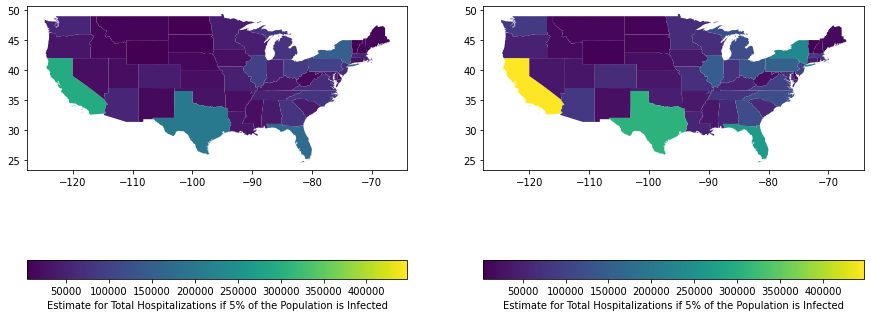

In [17]:
##Plotting TOTAL number of hospitalizations if 5% infected
# normalize color
vmin=Stateshp.HospLo05.min()
vmax=Stateshp.HospHi05.max()
vcenter = 250000 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['HospLo05', 'HospHi05']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col],   legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total Hospitalizations if 5% of the Population is Infected",
                            'orientation': "horizontal"})

C:\Users\u0008154\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  


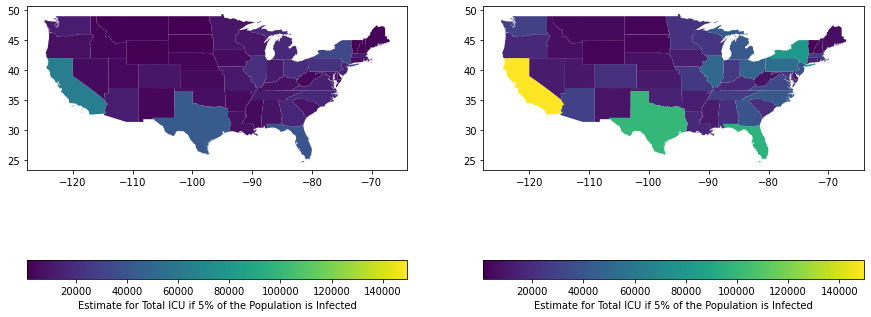

In [18]:
##Plotting TOTAL number of ICU if 5% infected
# normalize color
vmin=Stateshp.ICULo05.min()
vmax=Stateshp.ICUHi05.max()
vcenter = 75000 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ICULo05', 'ICUHi05']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col],   legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

C:\Users\u0008154\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  


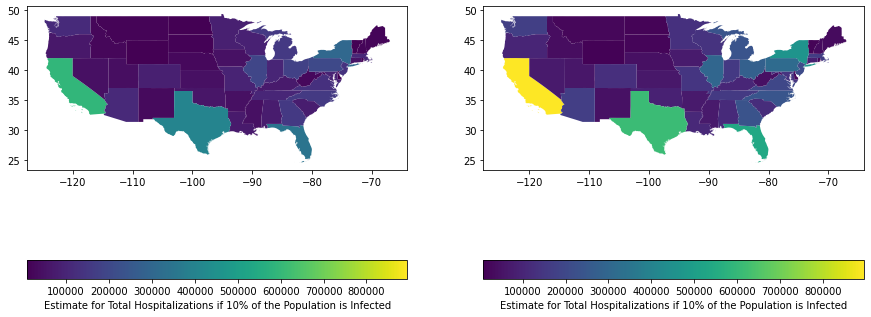

In [19]:
##Plotting TOTAL number of hospitalizations if 10% infected
# normalize color
vmin=Stateshp.HospLo10.min()
vmax=Stateshp.HospHi10.max()
vcenter = 450000 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['HospLo10', 'HospHi10']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col],   legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total Hospitalizations if 10% of the Population is Infected",
                            'orientation': "horizontal"})

C:\Users\u0008154\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  


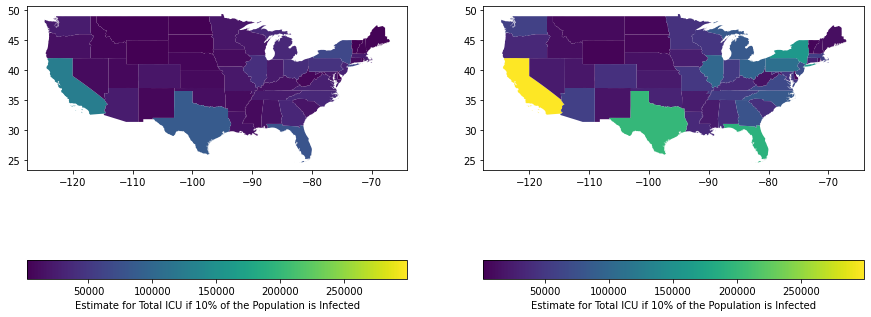

In [20]:
##Plotting TOTAL number of ICU if 10% infected
# normalize color
vmin=Stateshp.ICULo10.min()
vmax=Stateshp.ICUHi10.max()
vcenter = 150000 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ICULo10', 'ICUHi10']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col],   legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 10% of the Population is Infected",
                            'orientation': "horizontal"})

https://wwwnc.cdc.gov/eid/article/12/1/05-0396_article
https://onlinelibrary.wiley.com/doi/full/10.1111/j.1750-2659.2010.00147.x
https://www.sciencedirect.com/science/article/pii/S0022519312003761?via%3Dihub#bib11
tm is related to the turning point ti (defined as the time when the rate of case accumulation changes from increasing to
decreasing or vice versa)  tm= ti+(ln(a)/r).  r is the growth rate.  K is the carryting capacity (maximum outbreak number)
RN is the rate below - I generated this using the double time of 5.2 days.  The reproduction number is 1.94.
RN is from the published doubling time of 5.2 - 6.4: (log(2)/DT ).  I've seen some models use a growth rate as high as 
0.15 - but I'm not using those models.
a is the exponent of deviation of the epidemiologic curve


In [21]:
FinTblStateFin['RN']=0.13
FinTblStateFin['RN2']=0.17
FinTblStateFin['a']=1.07

def Richards010hl (row):
  return (row['HospLo01']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['HospLo01']/(1+np.exp(-row['RN']*(45-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards010hh (row):
  return (row['HospHi01']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['HospHi01']/(1+np.exp(-row['RN']*(45-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards010il (row):
  return (row['ICULo01']/(1+np.exp(-row['RN']*(54-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['ICULo01']/(1+np.exp(-row['RN']*(46-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards010ih (row):
  return (row['ICUHi01']/(1+np.exp(-row['RN']*(54-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['ICUHi01']/(1+np.exp(-row['RN']*(46-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))


def Richards050hl (row):
  return (row['HospLo05']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['HospLo05']/(1+np.exp(-row['RN']*(45-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards050hh (row):
  return (row['HospHi05']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['HospHi05']/(1+np.exp(-row['RN']*(45-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards050il (row):
  return (row['ICULo05']/(1+np.exp(-row['RN']*(54-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['ICULo05']/(1+np.exp(-row['RN']*(46-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards050ih (row):
  return (row['ICUHi05']/(1+np.exp(-row['RN']*(54-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))-(row['ICUHi05']/(1+np.exp(-row['RN']*(46-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))


def Richards050hl2 (row):
  return (row['HospLo05']/(1+np.exp(-row['RN2']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['HospLo05']/(1+np.exp(-row['RN']*(45-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards050hh2 (row):
  return (row['HospHi05']/(1+np.exp(-row['RN2']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['HospHi05']/(1+np.exp(-row['RN']*(45-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards050il2 (row):
  return (row['ICULo05']/(1+np.exp(-row['RN2']*(54-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['ICULo05']/(1+np.exp(-row['RN']*(46-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))

def Richards050ih2 (row):
  return (row['ICUHi05']/(1+np.exp(-row['RN2']*(54-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['ICUHi05']/(1+np.exp(-row['RN']*(46-(50+np.log(row['a'])/row['RN']))))**(1/row['a']))


def Richards100hl (row):
  return (row['HospLo10']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['HospLo10']/(1+np.exp(-row['RN2']*(45-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

def Richards100hh (row):
  return (row['HospHi10']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['HospHi10']/(1+np.exp(-row['RN2']*(45-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

def Richards100il (row):
  return (row['ICULo10']/(1+np.exp(-row['RN']*(54-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['ICULo10']/(1+np.exp(-row['RN2']*(46-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

def Richards100ih (row):
  return (row['ICUHi10']/(1+np.exp(-row['RN']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['ICUHi10']/(1+np.exp(-row['RN2']*(46-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))


def Richards100hl2 (row):
  return (row['HospLo10']/(1+np.exp(-row['RN2']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['HospLo10']/(1+np.exp(-row['RN2']*(45-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

def Richards100hh2 (row):
  return (row['HospHi10']/(1+np.exp(-row['RN2']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['HospHi10']/(1+np.exp(-row['RN2']*(45-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

def Richards100il2 (row):
  return (row['ICULo10']/(1+np.exp(-row['RN2']*(54-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['ICULo10']/(1+np.exp(-row['RN2']*(46-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

def Richards100ih2 (row):
  return (row['ICUHi10']/(1+np.exp(-row['RN2']*(55-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))-(row['ICUHi10']/(1+np.exp(-row['RN2']*(46-(50+np.log(row['a'])/row['RN2']))))**(1/row['a']))

FinTblStateFin['HospLo01Cnt_100']=FinTblStateFin.apply(Richards010hl, axis=1)
FinTblStateFin['HospHi01Cnt_100']=FinTblStateFin.apply(Richards010hh, axis=1)
FinTblStateFin['ICULo01Cnt_100']=FinTblStateFin.apply(Richards010il, axis=1)
FinTblStateFin['ICUHi01Cnt_100']=FinTblStateFin.apply(Richards010ih, axis=1)

FinTblStateFin['HospLo05Cnt_100']=FinTblStateFin.apply(Richards050hl, axis=1)
FinTblStateFin['HospHi05Cnt_100']=FinTblStateFin.apply(Richards050hh, axis=1)
FinTblStateFin['ICULo05Cnt_100']=FinTblStateFin.apply(Richards050il, axis=1)
FinTblStateFin['ICUHi05Cnt_100']=FinTblStateFin.apply(Richards050ih, axis=1)
FinTblStateFin['HospLo05Cnt_100_2']=FinTblStateFin.apply(Richards050hl2, axis=1)
FinTblStateFin['HospHi05Cnt_100_2']=FinTblStateFin.apply(Richards050hh2, axis=1)
FinTblStateFin['ICULo05Cnt_100_2']=FinTblStateFin.apply(Richards050il2, axis=1)
FinTblStateFin['ICUHi05Cnt_100_2']=FinTblStateFin.apply(Richards050ih2, axis=1)


FinTblStateFin['HospLo10Cnt_100']=FinTblStateFin.apply(Richards100hl, axis=1)
FinTblStateFin['HospHi10Cnt_100']=FinTblStateFin.apply(Richards100hh, axis=1)
FinTblStateFin['ICULo10Cnt_100']=FinTblStateFin.apply(Richards100il, axis=1)
FinTblStateFin['ICUHi10Cnt_100']=FinTblStateFin.apply(Richards100ih, axis=1)
FinTblStateFin['HospLo10Cnt_100_2']=FinTblStateFin.apply(Richards100hl2, axis=1)
FinTblStateFin['HospLo10Cnt_100_2']=FinTblStateFin.apply(Richards100hh2, axis=1)
FinTblStateFin['ICULo10Cnt_100_2']=FinTblStateFin.apply(Richards100il2, axis=1)
FinTblStateFin['ICUHi10Cnt_100_2']=FinTblStateFin.apply(Richards100ih2, axis=1)


In [22]:
FinTblStateFin.to_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\FinTblStateFin_wCalc.csv")
FinTblStateFin.head()

,STATE,STNAME,HospitalizationLower,HospitalizationUpper,ICULower,ICUUpper,FatalLower,FatalUpper,COUNTY,AGEGRP,...,HospHi05Cnt_100_2,ICULo05Cnt_100_2,ICUHi05Cnt_100_2,HospLo10Cnt_100,HospHi10Cnt_100,ICULo10Cnt_100,ICUHi10Cnt_100,HospLo10Cnt_100_2,ICULo10Cnt_100_2,ICUHi10Cnt_100_2
0,1,Alabama,1.48,2.542,0.37,1.046,0.248,0.553,80802,11457,...,20186.133573,2383.653598,5690.243108,26694.864162,40787.711730,4828.942466,12692.334981,45311.268420,5368.568184,14260.581206
1,2,Alaska,1.48,2.542,0.37,1.046,0.248,0.553,78120,4959,...,2749.364774,313.245890,721.842987,3714.901435,5555.313376,634.591529,1610.102207,6171.424796,705.506002,1809.044066
2,4,Arizona,1.48,2.542,0.37,1.046,0.248,0.553,3744,2565,...,29496.763730,3456.856148,8311.926541,38809.102113,59600.591249,7003.097877,18540.114014,66210.588276,7785.681588,20830.903207
3,5,Arkansas,1.48,2.542,0.37,1.046,0.248,0.553,101250,12825,...,12322.621662,1446.251184,3468.801053,16246.042028,24898.851397,2929.898776,7737.311765,27660.255777,3257.309744,8693.322616
4,6,California,1.48,2.542,0.37,1.046,0.248,0.553,60552,9918,...,156954.725701,18015.433910,42660.792885,208685.620737,317139.688156,36496.701504,95156.755793,352312.030442,40575.142873,106914.184452


In [23]:
FinTblStateFin['NAME']=FinTblStateFin['STNAME']
Stateshp=Stateshp.merge(FinTblStateFin, on='NAME')

In [24]:
##THESE ARE AVERAGE PERSON DAYS PER MONTH - MIN MAX ARE THE PER DAY MIN MAX
ElecICUData = pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\ICUStateAvg.csv", encoding='ISO-8859-1') 
ElecICUMinMax= pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\ICUdays_minmax.csv", encoding='ISO-8859-1') 
ElecHospData= pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\inpatStateAvg.csv", encoding='ISO-8859-1') 
ElecHospMinMax= pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\Inpatdays_minmax.csv", encoding='ISO-8859-1') 
ElecICUMax=pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\MaxICU.csv", encoding='ISO-8859-1')
Cross=pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\StateAbrev2.csv")
##Mutated for plots
ICUPropPlt=pd.read_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\StateICUMonthPlotProp.csv", encoding='ISO-8859-1') 

In [25]:
ElecHospData['AvgBed']=ElecHospData['Sum of all_avg']/365
ElecHospData['AvgBedElec']=ElecHospData['Sum of elc_avg']/365
ElecHospData['state_name']=ElecHospData['Row Labels']
ElecHospData['STNAME']=ElecHospData['state_name']
ElecHospData.head()

,Row Labels,Sum of all_avg,Sum of elc_avg,AvgBed,AvgBedElec,state_name,STNAME
0,Alabama,2.019988e+05,62892.666670,553.421370,172.308676,Alabama,Alabama
1,Alaska,8.053433e+03,2248.366667,22.064201,6.159909,Alaska,Alaska
2,Arizona,1.936968e+05,51278.466670,530.676073,140.488950,Arizona,Arizona
3,Arkansas,7.455117e+04,23045.233330,204.249772,63.137626,Arkansas,Arkansas
4,California,1.462610e+06,443774.166700,4007.150595,1215.819635,California,California


In [26]:
ElecICUData['AvgICUBed']=ElecICUData['Sum of all_avg']/365
ElecICUData['AvgICUBedElec']=ElecICUData['Sum of elc_avg']/365
ElecICUData['state_name']=ElecICUData['Row Labels']
ElecICUData['STNAME']=ElecICUData['state_name']
ElecICUData.head()

,Row Labels,Sum of all_avg,Sum of elc_avg,StateYrAvg,AvgICUBed,AvgICUBedElec,state_name,STNAME
0,Alabama,11289.4,3345.6,0.296349,30.929863,9.166027,Alabama,Alabama
1,Alaska,505.0,121.0,0.239604,1.383562,0.331507,Alaska,Alaska
2,Arizona,18807.2,4016.6,0.213567,51.526575,11.004384,Arizona,Arizona
3,Arkansas,3510.4,1023.4,0.291534,9.617534,2.803836,Arkansas,Arkansas
4,California,134681.6,34987.6,0.259780,368.990685,95.856438,California,California


In [27]:
ElecHospMinMax['state_name']=ElecHospMinMax['state']
ElecHospMinMax=ElecHospMinMax.groupby(['state_number','state_name'])
ElecHospMinMax=pd.DataFrame(ElecHospMinMax.max()).reset_index()
ElecHospMinMax.head()

,state_number,state_name,Unnamed: 0,year,min,max,state
0,1,Unknown Nation,5,2014,3054,5628,Unknown Nation
1,4,Connecticut,10,2014,853,1459,Connecticut
2,5,Maine,15,2014,240,457,Maine
3,6,Massachusetts,20,2014,550,1130,Massachusetts
4,7,New Hampshire,25,2014,216,378,New Hampshire


In [28]:
ElecHospData=ElecHospData.merge(ElecHospMinMax,on="state_name",how="left")
ElecHospData['AvgAvail']=ElecHospData['max']-ElecHospData['AvgBed']
ElecHospData['AvgAvailmElec']=ElecHospData['AvgAvail']+ElecHospData['AvgBedElec']
ElecHospData['PropAvailmElec']=ElecHospData['AvgAvailmElec']/ElecHospData['max']
ElecHospData['PropAvailNorm']=1-ElecHospData['AvgBed']/ElecHospData['max']
ElecHospData.head(10)
ElecHospData.to_csv('X:\PPG\FLAG\FLAGDataHeidi\SPARC\ElecHospData.csv')

In [29]:
ElecICUMinMax=ElecICUMinMax.groupby(['state_number','state_name'])
ElecICUMinMax=pd.DataFrame(ElecICUMinMax.max()).reset_index()
ElecICUMinMax=ElecICUMinMax.set_index('state_name')
ElecICUData=ElecICUData.set_index('state_name')

ElecICUData.drop(["Unknown Nation", "Puerto Rico","Grand Total"], inplace = True) 
ElecICUMinMax.drop(["Unknown Nation", "Puerto Rico"], inplace = True) 
ElecICUData=ElecICUData.merge(ElecICUMinMax,on="state_name",how="left")
ElecICUData['AvgAvail']=ElecICUData['max']-ElecICUData['AvgICUBed']
ElecICUData['AvgAvailmElec']=ElecICUData['AvgAvail']+ElecICUData['AvgICUBedElec']
ElecICUData['PropAvailmElec']=ElecICUData['AvgAvailmElec']/ElecICUData['max']
ElecICUData['PropAvailNorm']=1-ElecICUData['AvgICUBed']/ElecICUData['max']
ElecICUData.head(10)
ElecICUData.to_csv('X:\PPG\FLAG\FLAGDataHeidi\SPARC\ElecICUData.csv')

In [30]:
ElecICUData['NAME']=ElecICUData['Row Labels']
Stateshp=Stateshp.merge(ElecICUData, on='NAME')

In [31]:
ElecHospData['State']=ElecHospData['Row Labels']
ElecHospData=ElecHospData.merge(Cross, on='State')
ElecHospData['STUSPS']=ElecHospData['Ab']
ElecHospData=ElecHospData.merge(StateBeds, on='STUSPS')
ElecHospData=ElecHospData.merge(FinTblStateFin, on='STNAME')



In [32]:
##IF NORMAL BED CAPACITY
Stateshp['ROverICU']=Stateshp['ICULo05Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailNorm']))
Stateshp['ROverICUHi']=Stateshp['ICUHi05Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailNorm']))
Stateshp['ROverICUmElec']=Stateshp['ICULo05Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']))
Stateshp['ROverICUHimElec']=Stateshp['ICUHi05Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']))

Stateshp['ROverICU01']=Stateshp['ICULo01Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailNorm']))
Stateshp['ROverICUHi01']=Stateshp['ICUHi01Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailNorm']))
Stateshp['ROverICUmElec01']=Stateshp['ICULo01Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']))
Stateshp['ROverICUHimElec01']=Stateshp['ICUHi01Cnt_100']/(Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']))


##ABSOLUTE VALUES
Stateshp['ROverICUAbs']=Stateshp['ICULo05Cnt_100']-(Stateshp['Total ICU Beds']*(Stateshp['PropAvailNorm']))
Stateshp['ROverICUHiAbs']=Stateshp['ICUHi05Cnt_100']-(Stateshp['Total ICU Beds']*(Stateshp['PropAvailNorm']))
Stateshp['ROverICUmElecAbs']=Stateshp['ICULo05Cnt_100']-(Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']))
Stateshp['ROverICUHimElecABs']=Stateshp['ICUHi05Cnt_100']-(Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']))


In [33]:
##NOT MAPPING SO NOT JOINING TO SHPFILE
##IF NORMAL BED CAPACITY
ElecHospData['NumberAvail']=ElecHospData['Total Hospital Beds']*ElecHospData['PropAvailNorm']
ElecHospData['NumberAvailmElec']=ElecHospData['Total Hospital Beds']*ElecHospData['PropAvailmElec']
ElecHospData['NumberEmerg']=ElecHospData['Total Hospital Beds']*(1-ElecHospData['PropAvailmElec'])
ElecHospData['NumberElec']=ElecHospData['Total Hospital Beds']*(ElecHospData['PropAvailmElec']-ElecHospData['PropAvailNorm'])
ElecHospData.head()

ElecHospData['ROverHBed']=ElecHospData['HospLo05Cnt_100']/(ElecHospData['Total Hospital Beds']*(ElecHospData['PropAvailNorm']))
ElecHospData['ROverHBedHi']=ElecHospData['HospHi05Cnt_100']/(ElecHospData['Total Hospital Beds']*(ElecHospData['PropAvailNorm']))
ElecHospData['ROverHBedmElec']=ElecHospData['HospLo05Cnt_100']/(ElecHospData['Total Hospital Beds']*(ElecHospData['PropAvailmElec']))
ElecHospData['ROverHBedHimElec']=ElecHospData['HospHi05Cnt_100']/(ElecHospData['Total Hospital Beds']*(ElecHospData['PropAvailmElec']))


In [34]:
print(ElecHospData['NumberAvail'].sum())
print(ElecHospData['NumberAvailmElec'].sum())
print(ElecHospData['NumberEmerg'].sum())
print(ElecHospData['NumberElec'].sum())
print("Quartiles")
print("Q2 quantile of Avail : ", np.quantile(ElecHospData['NumberAvail'], .50)) 
print("Q1 quantile of Avail : ", np.quantile(ElecHospData['NumberAvail'], .25)) 
print("Q3 quantile of Avail : ", np.quantile(ElecHospData['NumberAvail'], .75)) 
print("Mean of Avail : ", ElecHospData['NumberAvail'].mean()) 

print("Q2 quantile of Emerg : ", np.quantile(ElecHospData['NumberEmerg'], .50)) 
print("Q1 quantile of Emerg : ", np.quantile(ElecHospData['NumberEmerg'], .25)) 
print("Q3 quantile of Emerg : ", np.quantile(ElecHospData['NumberEmerg'], .75)) 
print("Mean of Emerg : ", ElecHospData['NumberEmerg'].mean()) 

print("Q2 quantile of Elec : ", np.quantile(ElecHospData['NumberElec'], .50)) 
print("Q1 quantile of Elec : ", np.quantile(ElecHospData['NumberElec'], .25)) 
print("Q3 quantile of Elec : ", np.quantile(ElecHospData['NumberElec'], .75)) 
print("Mean of Elec : ", ElecHospData['NumberElec'].mean()) 

print("Q2 quantile of AvailmElec : ", np.quantile(ElecHospData['NumberAvailmElec'], .50)) 
print("Q1 quantile of AvailmElecAvailmElec : ", np.quantile(ElecHospData['NumberAvailmElec'], .25)) 
print("Q3 quantile of AvailmElec : ", np.quantile(ElecHospData['NumberAvailmElec'], .75)) 
print("Mean of AvailmElec : ", ElecHospData['NumberAvailmElec'].mean()) 


248362.95259229775
384626.9600437426
351369.0399562574
136264.00745144492
Quartiles
Q2 quantile of Avail :  3665.1050244501093
Q1 quantile of Avail :  1866.7289672979543
Q3 quantile of Avail :  6100.121322802779
Mean of Avail :  4967.259051845955
Q2 quantile of Emerg :  5078.158799539184
Q1 quantile of Emerg :  1744.7008784759892
Q3 quantile of Emerg :  8417.644063921216
Mean of Emerg :  7027.380799125147
Q2 quantile of Elec :  2001.2702515181365
Q1 quantile of Elec :  725.0304072833035
Q3 quantile of Elec :  3260.511007404428
Mean of Elec :  2725.280149028897
Q2 quantile of AvailmElec :  6014.829807499316
Q1 quantile of AvailmElecAvailmElec :  2553.6895402946866
Q3 quantile of AvailmElec :  9676.247596120775
Mean of AvailmElec :  7692.539200874853


In [37]:
print("Quartiles Hospital")
print("Q2 quantile of OverHosp : ", np.quantile(ElecHospData['ROverHBed'], .50)) 
print("Q1 quantile of OverHosp : ", np.quantile(ElecHospData['ROverHBed'], .25)) 
print("Q3 quantile of OverHosp : ", np.quantile(ElecHospData['ROverHBed'], .75)) 
print("Mean of OverHosp : ", ElecHospData['ROverHBed'].mean()) 
print(ElecHospData['ROverHBed'].max())
print(ElecHospData['ROverHBed'].min())

print("Q2 quantile of OverHospHi : ", np.quantile(ElecHospData['ROverHBedHi'], .50)) 
print("Q1 quantile of OverHospHi : ", np.quantile(ElecHospData['ROverHBedHi'], .25)) 
print("Q3 quantile of OverHospHi : ", np.quantile(ElecHospData['ROverHBedHi'], .75)) 
print("Mean of OverHospHi : ", ElecHospData['ROverHBedHi'].mean()) 
print(ElecHospData['ROverHBedHi'].max())
print(ElecHospData['ROverHBedHi'].min())

Quartiles Hospital
Q2 quantile of OverHosp :  2.9791731386585076
Q1 quantile of OverHosp :  2.2184563009059564
Q3 quantile of OverHosp :  3.7238139573923226
Mean of OverHosp :  2.9951895481188977
5.4158299129233445
0.9354423160493125
Q2 quantile of OverHospHi :  4.55212516998062
Q1 quantile of OverHospHi :  3.386218827444198
Q3 quantile of OverHospHi :  5.6826555392431715
Mean of OverHospHi :  4.575631630125631
8.230440619847517
1.4377766061886714


In [38]:
print("Quartiles Hospital Removal of Elective")
print("Q2 quantile of OverHosp : ", np.quantile(ElecHospData['ROverHBedmElec'], .50)) 
print("Q1 quantile of OverHosp : ", np.quantile(ElecHospData['ROverHBedmElec'], .25)) 
print("Q3 quantile of OverHosp : ", np.quantile(ElecHospData['ROverHBedmElec'], .75)) 
print("Mean of OverHosp : ", ElecHospData['ROverHBedmElec'].mean()) 
print(ElecHospData['ROverHBedmElec'].max())
print(ElecHospData['ROverHBedmElec'].min())

print("Q2 quantile of OverHospHi : ", np.quantile(ElecHospData['ROverHBedHimElec'], .50)) 
print("Q1 quantile of OverHospHi : ", np.quantile(ElecHospData['ROverHBedHimElec'], .25)) 
print("Q3 quantile of OverHospHi : ", np.quantile(ElecHospData['ROverHBedHimElec'], .75)) 
print("Mean of OverHospHi : ", ElecHospData['ROverHBedHimElec'].mean()) 
print(ElecHospData['ROverHBedHimElec'].max())
print(ElecHospData['ROverHBedHimElec'].min())

Quartiles Hospital Removal of Elective
Q2 quantile of OverHosp :  1.9205988539658567
Q1 quantile of OverHosp :  1.573972531781769
Q3 quantile of OverHosp :  2.4641154006770227
Mean of OverHosp :  1.9383898163429931
2.8570462573698556
0.7329693652398609
Q2 quantile of OverHospHi :  2.9096818927729258
Q1 quantile of OverHospHi :  2.4050266520148966
Q3 quantile of OverHospHi :  3.769542959652964
Mean of OverHospHi :  2.9617255103376308
4.369514139341234
1.1270423106553251


In [ ]:
ElecHospData.to_csv("X:\PPG\FLAG\FLAGDataHeidi\SPARC\ElecHospData.csv")

In [ ]:
Stateshp['NumberAvailICU']=Stateshp['Total ICU Beds']*Stateshp['PropAvailNorm']
Stateshp['NumberAvailmElecICU']=Stateshp['Total ICU Beds']*Stateshp['PropAvailmElec']
Stateshp['NumberEmergICU']=Stateshp['Total ICU Beds']*(1-Stateshp['PropAvailmElec'])
Stateshp['NumberElecICU']=Stateshp['Total ICU Beds']*(Stateshp['PropAvailmElec']-Stateshp['PropAvailNorm'])

In [ ]:
print(Stateshp['NumberAvailICU'].sum())
print(Stateshp['NumberEmergICU'].sum())
print(Stateshp['NumberElecICU'].sum())
print(Stateshp['NumberAvailmElecICU'].sum())
print("Quartiles")
print("Q2 quantile of Avail : ", np.quantile(Stateshp['NumberAvailICU'], .50)) 
print("Q1 quantile of Avail : ", np.quantile(Stateshp['NumberAvailICU'], .25)) 
print("Q3 quantile of Avail : ", np.quantile(Stateshp['NumberAvailICU'], .75)) 
print("Mean of Avail : ", Stateshp['NumberAvailICU'].mean()) 

print("Q2 quantile of Emerg : ", np.quantile(Stateshp['NumberEmergICU'], .50)) 
print("Q1 quantile of Emerg : ", np.quantile(Stateshp['NumberEmergICU'], .25)) 
print("Q3 quantile of Emerg : ", np.quantile(Stateshp['NumberEmergICU'], .75)) 
print("Mean of Emerg : ", Stateshp['NumberEmergICU'].mean()) 

print("Q2 quantile of Elec : ", np.quantile(Stateshp['NumberElecICU'], .50)) 
print("Q1 quantile of Elec : ", np.quantile(Stateshp['NumberElecICU'], .25)) 
print("Q3 quantile of Elec : ", np.quantile(Stateshp['NumberElecICU'], .75)) 
print("Mean of Elec : ", Stateshp['NumberElecICU'].mean()) 

print("Q2 quantile of AvailmElec : ", np.quantile(Stateshp['NumberAvailmElecICU'], .50)) 
print("Q1 quantile of AvailmElec : ", np.quantile(Stateshp['NumberAvailmElecICU'], .25)) 
print("Q3 quantile of AvailmElec : ", np.quantile(Stateshp['NumberAvailmElecICU'], .75)) 
print("Mean of AvailmElec : ", Stateshp['NumberAvailmElecICU'].mean()) 

In [ ]:
print("Quartiles")
print("Q2 quantile of OverICU : ", np.quantile(Stateshp['ROverICU'], .50)) 
print("Q1 quantile of OverICU : ", np.quantile(Stateshp['ROverICU'], .25)) 
print("Q3 quantile of OverICU : ", np.quantile(Stateshp['ROverICU'], .75)) 
print("Mean of OverICU : ", Stateshp['ROverICU'].mean()) 
print(Stateshp['ROverICU'].max())
print(Stateshp['ROverICU'].min())

print("Q2 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHi'], .50)) 
print("Q1 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHi'], .25)) 
print("Q3 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHi'], .75)) 
print("Mean of OverICU : ", Stateshp['ROverICUHi'].mean()) 
print(Stateshp['ROverICUHi'].max())
print(Stateshp['ROverICUHi'].min())

In [ ]:
print("Quartiles Rem ELEC")
print("Q2 quantile of OverICU : ", np.quantile(Stateshp['ROverICUmElec'], .50)) 
print("Q1 quantile of OverICU : ", np.quantile(Stateshp['ROverICUmElec'], .25)) 
print("Q3 quantile of OverICU : ", np.quantile(Stateshp['ROverICUmElec'], .75)) 
print("Mean of OverICU : ", Stateshp['ROverICUmElec'].mean()) 
print(Stateshp['ROverICUmElec'].max())
print(Stateshp['ROverICUmElec'].min())

print("Q2 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHimElec'], .50)) 
print("Q1 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHimElec'], .25)) 
print("Q3 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHimElec'], .75)) 
print("Mean of OverICU : ", Stateshp['ROverICUHimElec'].mean()) 
print(Stateshp['ROverICUHimElec'].max())
print(Stateshp['ROverICUHimElec'].min())

In [ ]:
print("Quartiles ABSOLUTE")
print("Q2 quantile of OverICU : ", np.quantile(Stateshp['ROverICUAbs'], .50)) 
print("Q1 quantile of OverICU : ", np.quantile(Stateshp['ROverICUAbs'], .25)) 
print("Q3 quantile of OverICU : ", np.quantile(Stateshp['ROverICUAbs'], .75)) 
print("Mean of OverICU : ", Stateshp['ROverICUAbs'].mean()) 
print(Stateshp['ROverICUAbs'].max())
print(Stateshp['ROverICUAbs'].min())

print("Sum: ", Stateshp['ROverICUAbs'].sum())

print("Q2 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHiAbs'], .50)) 
print("Q1 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHiAbs'], .25)) 
print("Q3 quantile of OverICUHi : ", np.quantile(Stateshp['ROverICUHiAbs'], .75)) 
print("Mean of OverICU : ", Stateshp['ROverICUHiAbs'].mean()) 
print(Stateshp['ROverICUHiAbs'].max())
print(Stateshp['ROverICUHiAbs'].min())

print("Sum: ", Stateshp['ROverICUHiAbs'].sum())

In [ ]:
##Plotting Over Capacity for ICU-Normal Beds
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 2 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICU', 'ROverICUHi']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Remove Elective Beds
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 2 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUmElec', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Remove Elective Beds; Change color
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 4 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUmElec', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='inferno',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Remove Elective Beds; Change color
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 4 
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUmElec', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='jet',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Low
# normalize color
##Final Plots
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 5
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICU', 'ROverICUmElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='coolwarm',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Ratio of ICU Cases to Beds if 5% of the Population is Infected: Low",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
##FINAL PLOT
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 5
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='coolwarm',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Ratio of ICU Cases to Beds if 5% of the Population is Infected: High",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICUHimElec01.min()
vmax=Stateshp.ROverICUHi01.max()
vcenter = 1
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi01', 'ROverICUHimElec01']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='coolwarm',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 1% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 2
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='bwr',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICUHimElec01.min()
vmax=Stateshp.ROverICUHi01.max()
vcenter = 1
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi01', 'ROverICUHimElec01']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='bwr',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 1% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 2
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='PuOr',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICUHimElec01.min()
vmax=Stateshp.ROverICUHi01.max()
vcenter = 1
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi01', 'ROverICUHimElec01']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='PuOr',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Ratio of ICU Cases to Beds if 1% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICU.min()
vmax=Stateshp.ROverICUHi.max()
vcenter = 2
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi', 'ROverICUHimElec']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='YlOrBr',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 5% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
##Plotting Over Capacity for ICU-Normal and Remove Elective Beds; Side by Side Hi
# normalize color
vmin=Stateshp.ROverICUHimElec01.min()
vmax=Stateshp.ROverICUHi01.max()
vcenter = 1
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
for i, col in enumerate (['ROverICUHi01', 'ROverICUHimElec01']):
    Stateshp[Stateshp['NAME'].isin(['Alaska','Hawaii','Puerto Rico'])==False].plot(column=[col], cmap='YlOrBr',legend=True, norm=divnorm, ax=ax[i],
           legend_kwds={'label': "Estimate for Total ICU if 1% of the Population is Infected",
                            'orientation': "horizontal"})

In [ ]:
CaseCnt3.head()

In [ ]:
PopData18.head()

In [ ]:
PopData18Age=PopData18.groupby(['AgeGrp2'])
PopData18Age.sum()
PopData18Age=pd.DataFrame(PopData18Age.sum()).reset_index()
